C:\Users\PC\AppData\Local\Temp\ipykernel_8196\3101168681.py:28: UserWarning: The following kwargs were not used by contour: 'linewidth'
  contour = plt.contourf(np.unique(d1), np.unique(d2), losses_rearr - 6, 75, cmap='hot', linewidth=0)


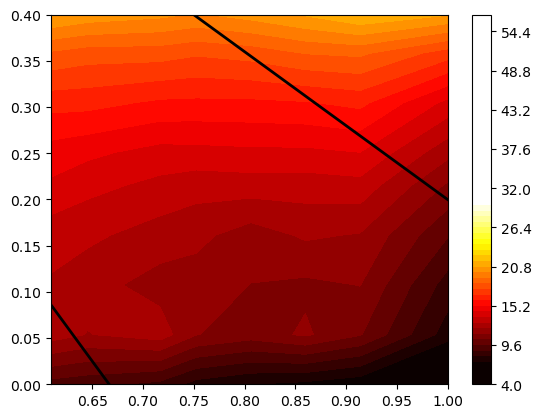

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV file
CSV = pd.read_csv("Bbheatmap3.csv", delimiter=';')
vout = CSV['vout']
iout = CSV['iout']
vin = CSV['vin']
iin = CSV['iin']
d1 = CSV['d1']
d2 = CSV['d2']

# Calculate additional parameters
pin = vin * iin
pout = iout * vout
losses = pin - pout
CSV['pin'] = pin
CSV['pout'] = pout
CSV['losses'] = losses
CSV = CSV[['vin', 'iin', 'iout', 'vout', 'd1', 'd2', 'pin', 'pout', 'losses']]
CSV.to_excel("output_data2.xlsx", index=False)
# Reshape losses array
losses_rearr = np.reshape(losses.to_numpy(), (len(np.unique(d1)), len(np.unique(d2))))
losses_rearr=losses_rearr.T
# Create contour plot
plt.figure()
contour = plt.contourf(np.unique(d1), np.unique(d2), losses_rearr - 6, 75, cmap='hot', linewidth=0)
plt.colorbar()

# Plot additional lines
d1b = np.linspace(np.min(np.unique(d1)), np.max(np.unique(d1)))
d2b = 1 - (d1b * 80 / 100)
plt.plot(d1b, d2b, 'k', linewidth=2)
d2b = 1 - (d1b * 150 / 100)
plt.plot(d1b, d2b, 'k', linewidth=2)

# Set axis limits
plt.axis([np.min(np.unique(d1)), np.max(np.unique(d1)), np.min(np.unique(d2)), 0.4])

# Set colorbar range
plt.clim(6.9, 30)

# Show the plot
plt.show()


In [14]:
losses_rearr_df = pd.DataFrame(losses_rearr, columns=np.unique(CSV['d2']), index=np.unique(CSV['d1']))
losses_rearr_df

,0.0000,0.0538,0.1075,0.1613,0.2151,0.2509,0.3047,0.3584,0.4122
0.6091,15.267888,18.407344,18.693812,19.148166,20.251035,20.841812,22.303759,24.275122,27.657576
0.6453,15.054120,17.966728,18.313766,18.969682,19.842275,20.584145,22.274532,23.989216,27.242232
0.7167,14.557884,18.417512,17.669548,18.431601,19.372936,20.093140,21.853262,23.957984,26.847292
0.7525,13.663358,17.232163,17.608698,18.220050,19.131079,20.126899,21.816810,23.712298,26.557026
0.8063,13.189452,16.784011,17.183543,17.587123,19.205938,20.213586,21.832031,23.933941,27.024825
0.8600,12.968583,17.325027,17.030105,18.118768,19.176843,20.219313,21.936988,24.431613,27.598701
0.9138,12.598095,16.469622,17.216760,17.937767,19.306392,20.394431,22.217809,24.565919,28.453338
1.0000,10.619024,13.606132,14.443644,15.657127,17.075178,18.248895,20.168160,23.200843,27.928072


In [20]:
losses

0      15.267888
1      15.054120
2      14.557884
3      14.050647
4      13.663358
         ...    
128    23.200843
129    27.928072
130    45.076487
131    50.000000
132    50.000000
Length: 133, dtype: float64